In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
#!pip install scipy

In [2]:
#Read data
df = pd.read_csv("../Sample/heart_2022_no_nans.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Sample/heart_2022_no_nans.csv'

In [3]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
df.shape

(246022, 40)

In [5]:
sub_df = df[["HeightInMeters", "WeightInKilograms", "BMI"]]

In [6]:
sub_df

,HeightInMeters,WeightInKilograms,BMI
0,1.60,71.67,27.99
1,1.78,95.25,30.13
2,1.85,108.86,31.66
3,1.70,90.72,31.32
4,1.55,79.38,33.07
...,...,...,...
246017,1.78,102.06,32.28
246018,1.93,90.72,24.34
246019,1.68,83.91,29.86
246020,1.70,83.01,28.66


<Axes: >

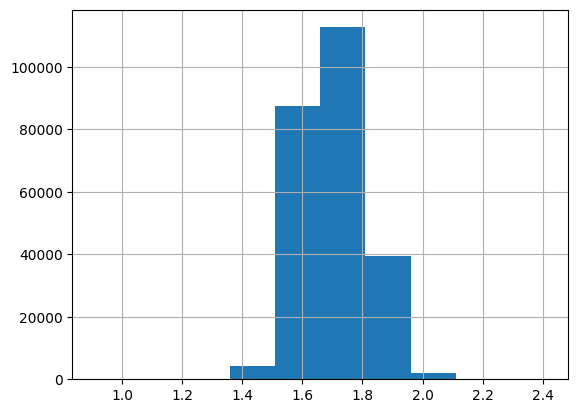

In [7]:
df["HeightInMeters"].hist()

In [ ]:
#Su dung stats scipy
#Trung binh chieu cao
mean_height = df["HeightInMeters"].mean()
#Do lech chuan
std_height = np.std(df["HeightInMeters"])

In [9]:
mean_height, std_height

(1.705150433701051, 0.10665385336158482)

In [10]:
sub_df[(sub_df["HeightInMeters"] < mean_height - 3*std_height) | (sub_df["HeightInMeters"] > mean_height + 3*std_height)]

,HeightInMeters,WeightInKilograms,BMI
246,1.22,136.08,91.55
267,1.22,44.91,30.21
616,1.22,45.81,30.82
1236,1.35,56.70,31.29
4465,2.03,124.74,30.21
...,...,...,...
245488,1.35,69.85,38.54
245548,2.03,90.72,21.97
245626,1.35,104.33,57.57
245801,2.13,68.04,14.95


In [ ]:
#Tinh zscore su dung thu vien scipy
sub_df["z_score_height"] = stats.zscore(df["HeightInMeters"])

sub_df["z_score_weight"] = stats.zscore(df["WeightInKilograms"])

sub_df["z_score_BMI"] = stats.zscore(df["BMI"])

sub_df


/var/folders/cw/93g5_j5x1db56lz_6bh335wh0000gn/T/ipykernel_16284/1906073421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["z_score_height"] = stats.zscore(df["HeightInMeters"])
/var/folders/cw/93g5_j5x1db56lz_6bh335wh0000gn/T/ipykernel_16284/1906073421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["z_score_weight"] = stats.zscore(df["WeightInKilograms"])
/var/folders/cw/93g5_j5x1db56lz_6bh335wh0000gn/T/ipykernel_16284/1906073421.py:5: SettingWithCopyWarning: 
A value is trying to b

,HeightInMeters,WeightInKilograms,BMI,z_score_height,z_score_weight,z_score_BMI
0,1.60,71.67,27.99,-0.985904,-0.560199,-0.104105
1,1.78,95.25,30.13,0.701799,0.545644,0.224420
2,1.85,108.86,31.66,1.358128,1.183918,0.459300
3,1.70,90.72,31.32,-0.048291,0.333198,0.407105
4,1.55,79.38,33.07,-1.454710,-0.198619,0.675759
...,...,...,...,...,...,...
246017,1.78,102.06,32.28,0.701799,0.865015,0.554481
246018,1.93,90.72,24.34,2.108218,0.333198,-0.664440
246019,1.68,83.91,29.86,-0.235814,0.013826,0.182971
246020,1.70,83.01,28.66,-0.048291,-0.028381,-0.001249


In [ ]:
#Lay ra cac diem outlier co |zscore| > 3
sub_df[(abs(sub_df["z_score_height"]) > 3)| (abs(sub_df["z_score_weight"]) > 3) | (abs(sub_df["z_score_BMI"]) > 3)]

,HeightInMeters,WeightInKilograms,BMI,z_score_height,z_score_weight,z_score_BMI
111,1.68,163.29,58.10,-0.235814,3.736547,4.518275
136,1.63,132.00,49.95,-0.704620,2.269126,3.267116
224,1.73,145.15,48.66,0.232993,2.885827,3.069080
239,1.78,181.44,57.39,0.701799,4.587736,4.409278
246,1.22,136.08,91.55,-4.548832,2.460467,9.653400
...,...,...,...,...,...,...
245548,2.03,90.72,21.97,3.045831,0.333198,-1.028274
245626,1.35,104.33,57.57,-3.329935,0.971473,4.436911
245801,2.13,68.04,14.95,3.983443,-0.730436,-2.105959
245889,1.60,127.01,49.60,-0.985904,2.035107,3.213385
